# An example of the Data structure 
The data structure is used for sampling from an unnormalized categorical distribution and updating the distribution.

import the class

In [2]:
from TreeSampler import Tree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize a tree object

In [3]:
N = 1e5 ## Number of leaves, i.e., the number of categories (or datapoints in our work)
Weight = Tree(N) # The leafs are initialized to 1

**Initializing the sampling probability of node i proportional to i** 

In [4]:
vals = list(range(int(N)))
Weight.initialize(vals)

In [5]:
samples = [Weight.sample()[0] for _ in range(100000)]

Text(0, 0.5, 'Sampling Probability')

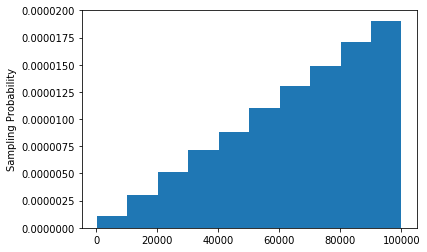

In [6]:
plt.hist(samples,density=True);
plt.ylabel('Sampling Probability')

**searching for a node=i with value=v such that \sum_{j=1}^i node.v <= v <= \sum_{j=1}^{i+1} node.v**

In [7]:
node = Weight.find(1.5)
node.v

2

## Comparing the running time with the numpy implementation with 10000 samples

**Tree structure**

In [8]:
vals = list(range(int(N)))
Weight.initialize(vals)

In [9]:
%%timeit
for _ in range(10000):
    node = Weight.find_id(2)
    Weight.update(node,node.v*(1+1e-4) )
    Weight.sample()[0]

531 ms ± 93.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**numpy sampler**

In [10]:
elements = list(range(int(N)))
vals = np.arange(int(N))
sum_vals = np.sum(vals)
prob = vals / sum_vals

In [11]:
%%timeit
sum_vals = np.sum(vals)
prob = vals / sum_vals
for i in range(10000):
    #old_val = vals[2]
    #vals[2] *= (1+1e-4)
    #sum_vals += vals[2] - old_val
    #prob = vals / sum_vals
    np.random.choice(elements, size = 1, replace=True, p=prob)

1min 34s ± 5.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
